In [54]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

### Read the input file and check the data dimension

In [33]:
df = pd.read_csv('german_credit.csv')
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [34]:
df.shape

(1000, 21)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [36]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [37]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [38]:
# seperating numerical variables and categorical variables
numvars = ['duration_in_month', 'credit_amount', 'installment_as_income_perc',
          'present_res_since', 'age', 'credits_this_bank', 'people_under_maintenance', 'default']
catvars = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since',
          'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
          'housing', 'job', 'telephone', 'foreign_worker']

In [39]:
dummyvars = pd.get_dummies(df[catvars])
dummyvars.head()

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [40]:
# combining both the dataframes(encoded and numbers)
df_clean = pd.concat([df[numvars],dummyvars], axis=1)
df_clean.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [20]:
# dummies = pd.get_dummies(df)
# dummies.head()

In [13]:
# dummies.shape

(1000, 62)

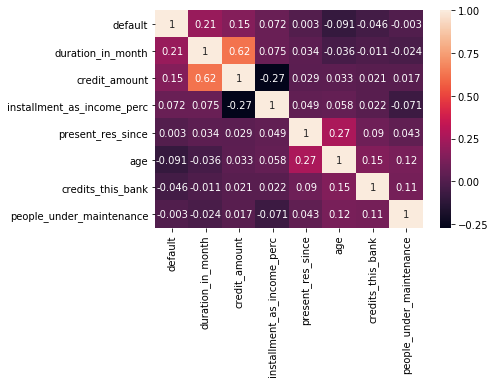

In [149]:
sns.heatmap(df.corr(),annot=True)

In [19]:
# sns.heatmap(dummies.corr(),annot=True)

In [18]:
# dummies.corr()

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [42]:
df50 = df_clean.sample(frac =.50, random_state= 4) 
X_clean = df50.drop('default',axis=1)
y_clean = df50['default']

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
698,18,1800,4,2,24,2,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
577,24,1927,3,2,33,2,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
763,21,12680,4,4,30,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
790,21,1188,2,4,39,1,2,1,1,0,...,1,0,0,1,0,0,1,0,0,1
520,24,5507,3,4,44,2,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [ ]:
# already done above

In [47]:
dummyvars.head()

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [44]:
df50.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
698,18,1800,4,2,24,2,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
577,24,1927,3,2,33,2,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
763,21,12680,4,4,30,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
790,21,1188,2,4,39,1,2,1,1,0,...,1,0,0,1,0,0,1,0,0,1
520,24,5507,3,4,44,2,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [46]:
df_clean.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
default,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
account_check_status_0 <= ... < 200 DM,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,0.119581,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,0.258333,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [45]:
df50.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
698,18,1800,4,2,24,2,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
577,24,1927,3,2,33,2,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
763,21,12680,4,4,30,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
790,21,1188,2,4,39,1,2,1,1,0,...,1,0,0,1,0,0,1,0,0,1
520,24,5507,3,4,44,2,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state = 4)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [97]:
rf = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion="entropy", random_state=9999)

In [98]:
rf_model = rf.fit(X_train, y_train)

In [99]:
y_pred = rf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [100]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

    0   1
0  98  10
1  27  15


In [101]:
print("accuracy score: ",accuracy_score(y_test,y_pred))

accuracy score:  0.7533333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [102]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
credit_amount,0.105537
age,0.085848
duration_in_month,0.080339
account_check_status_no checking account,0.045194
present_res_since,0.035082
installment_as_income_perc,0.034834
account_check_status_< 0 DM,0.026057
savings_... < 100 DM,0.021817
purpose_car (new),0.018470
account_check_status_0 <= ... < 200 DM,0.018401


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [103]:
from sklearn.model_selection import KFold,cross_val_score

In [104]:
# Use below values
num_folds = 10
seed = 77

In [105]:
#Validate the Random Forest model build above using k fold

In [106]:
scores = cross_val_score(rf_model, X_train, y_train, cv=num_folds)

In [107]:
#Calculate Mean score

In [132]:
print("Mean Score:",np.mean(scores))

Mean Score: 0.743295985060691


In [109]:
# Calculate score standard deviation using std()

In [133]:
print("Standard Deviation:",scores.std())

Standard Deviation: 0.046415674014713366


# Q8 Print the confusion matrix( 1 Marks)

In [111]:
confusion_matrix(y_test,y_pred)

array([[98, 10],
       [27, 15]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [113]:
# from confusion matrix
TP = 15
FP = 10
TN = 98
FN = 27

In [118]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
print("Precision: ",Precision)
print("Recall: ",Recall)

Precision:  0.6
Recall:  0.35714285714285715


In [119]:
print("Correct Prediction Percentage:",((TP+TN)/(TP+FP+FN+TN)))

Correct Prediction Percentage: 0.7533333333333333


In [120]:
accuracy_score(y_test,y_pred)

0.7533333333333333

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [126]:
from sklearn.metrics import roc_curve,auc

In [127]:
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

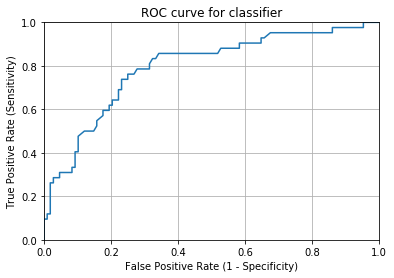

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [131]:
roc_auc2 = auc(fpr, tpr)
roc_auc2

0.7937610229276896

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [146]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [147]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf.fit(X_, y_)
    y_pred = rf.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [148]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7426666666666666
Standard deviation:  0.027519689920733725
